In [1]:
#https://www.tensorflow.org/tutorials/keras/basic_regression

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)


1.9.0


In [2]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print('train_data: ' + str(len(train_data)))
print('test_data: ' + str(len(test_data)))


train_data: 404
test_data: 102


In [3]:
print(train_data[0: 2])
print(train_labels[0:20])


[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]]
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5]


In [4]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features


Training set: (404, 13)
Testing set:  (102, 13)


In [5]:
# shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [6]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

print(df.shape)

(404, 13)


In [7]:
print(train_labels[0:10])

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [8]:
# Normalize feature
mean = train_data.mean(axis=0)
print(mean)
std = train_data.std(axis=0)
print(std)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [9]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                          input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [10]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                   validation_split=0.2, verbose=0,
                   callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

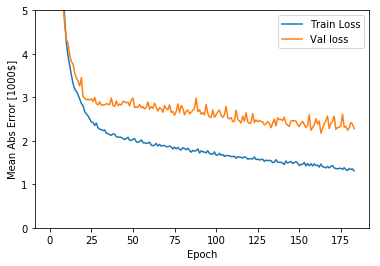

In [13]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
            label = 'Val loss')
    plt.legend()
    plt.ylim([0,5])
    
plot_history(history)


In [12]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                   validation_split=0.2, verbose=0,
                   callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................

In [14]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2814.99


In [15]:
test_predictions = model.predict(test_data).flatten()
print(test_predictions)


[ 7.8480577 17.808304  20.7486    32.606068  23.9123    20.283604
 25.309376  21.241024  17.671227  22.353346  17.893204  16.16011
 15.014255  40.02376   20.791613  19.354677  25.61903   17.276447
 19.623991  25.115921  11.107609  13.47219   20.45548   16.167698
 18.590725  24.584776  27.912743  29.184177  11.4780855 19.507322
 18.842627  14.596156  31.846909  24.297218  21.02653    8.138133
 16.344612  15.788965  20.152895  25.443493  30.182888  26.708754
 13.449997  41.43423   28.572994  24.81013   26.171198  18.277882
 21.42219   21.064264  35.14182   19.885033  10.097651  14.320861
 34.294674  26.689741  11.682779  46.01974   32.76364   23.244347
 24.339146  15.691361  13.517818  18.509869  22.27512   18.95446
 13.466945  20.305239  11.141176   7.4960546 24.645046  28.05199
 24.50563   11.672813  23.810396  18.565292  18.491024  22.7499
 33.851494   9.979791  21.072514  35.501926  14.226052  13.241813
 17.01794   17.607307  20.423775  17.60915   19.577686  32.556133
 20.562122  17.